<a href="https://colab.research.google.com/github/Vritik-a/NNDL_42_2022/blob/main/Autoencoder/Simple_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
print("")

In [3]:
## Seeding
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
## Loading the MNIST dataset and then normalizing the images.
dataset = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
H = 28
W = 28
C = 1

In [6]:
## Flattening the images.
x_train = np.reshape(x_train, (-1, H * W * C))
x_test = np.reshape(x_test, (-1, H * W * C))
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [7]:
## Latent space
latent_dim = 32

In [8]:
## Building the autoencoder
inputs = Input(shape=(H*W*C,))
h = Dense(latent_dim, activation="relu")(inputs)
outputs = Dense(H*W*C, activation="sigmoid")(h)

autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(1e-3), loss='binary_crossentropy')
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1834 - val_loss: 0.1670
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1568 - val_loss: 0.1473
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1408 - val_loss: 0.1336
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1292 - val_loss: 0.1235
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1210 - val_loss: 0.1163
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1150 - val_loss: 0.1111
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1106 - val_loss: 0.1073
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1070 - val_loss: 0.1046
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1042 - val_loss: 0.1025
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1019 - val_loss: 0.100

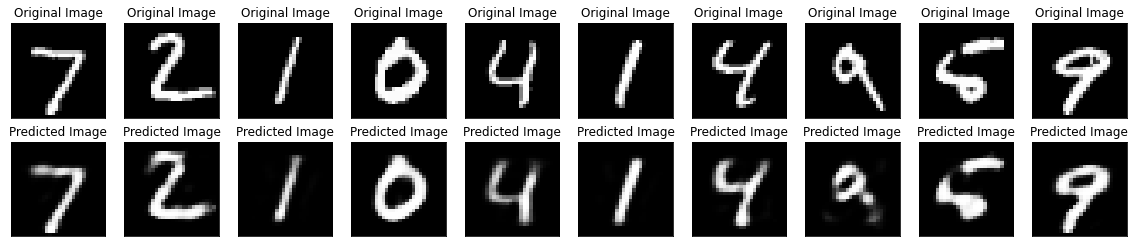

In [10]:
## Training the autoencoder
autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test)
)

test_pred_y = autoencoder.predict(x_test)

n = 10  ## how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ## display original
    ax = plt.subplot(2, n, i + 1)
    ax.set_title("Original Image")
    plt.imshow(x_test[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ## display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    ax.set_title("Predicted Image")
    plt.imshow(test_pred_y[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)